# 2. Formulation
## 2.1 1D mechanical lattice on the inertial frame of reference

(629, 2) (629, 2, 2)


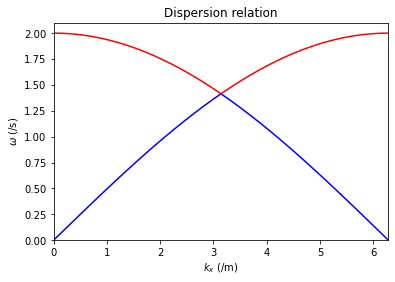

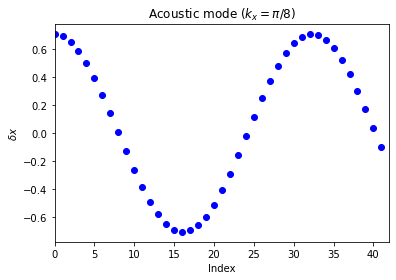

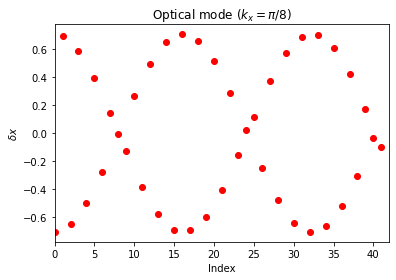

In [2]:
import numpy as np

κ = 1.
m = 1.
ω0 = np.sqrt(κ / m)
ks = np.arange(0, 2 * np.pi, 0.01)

evals_all = []
evecs_all = []
for k in ks: 
    K = np.exp(1.j * k)
    H = ω0 ** 2 * np.array([
        [2, -1 - K.conj()],
        [-1 - K, 2]
    ])
    evals, evecs = np.linalg.eigh(H)
    idcs = np.argsort(evals)
    evals, evecs = evals[idcs], evecs[idcs]
    evals_all.append(evals)
    evecs_all.append(evecs)
evals_all = np.array(evals_all)
evecs_all = np.array(evecs_all)


print(evals_all.shape, evecs_all.shape)

import matplotlib.pyplot as plt
# fig = plt.figure()
plt.plot(ks, np.sqrt(evals_all[:, 0]).real, color='blue')
plt.plot(ks, np.sqrt(evals_all[:, 1]).real, color='red')
plt.title("Dispersion relation")
plt.xlabel(r"$k_x$ (/m)")
plt.xlim(0, np.pi * 2)
plt.ylabel(r"$\omega$ (/s)")
plt.ylim(0)
plt.show()
# fig.savefig("1d-dispersion.png")


# Plot acoustic mode
import matplotlib.pyplot as plt

# fig = plt.figure()
N = 21
wanted = np.pi / 8
idx = min(range(len(ks)), key=lambda i: abs(ks[i]-wanted))
x = np.arange(N * 2)
acoustic = []
light = []
for i in range(N):
    K = np.exp(i * 1.j * ks[idx])
    acoustic.append((evecs_all[idx, :, 0] * K).real)
    light.append((evecs_all[idx, :, 1] * K).real)
plt.scatter(x, acoustic, color='blue')
plt.title(r"Acoustic mode ($k_x=\pi/8$)")
plt.xlabel(r"Index")
plt.xlim(0, N * 2)
plt.ylabel(r"$\delta x$")
plt.show()
# fig.savefig("1d-acoustic.png")

# Plot light mode
import matplotlib.pyplot as plt

# fig = plt.figure()
plt.scatter(x, light, color='red')
plt.title(r"Optical mode ($k_x=\pi/8$)")
plt.xlabel(r"Index")
plt.xlim(0, N * 2)
plt.ylabel(r"$\delta x$")
plt.show()
# fig.savefig("1d-optical.png")

### Why don't need to worry about y direction wavenumber

(63, 63, 2)


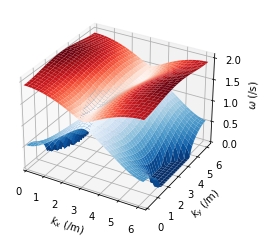

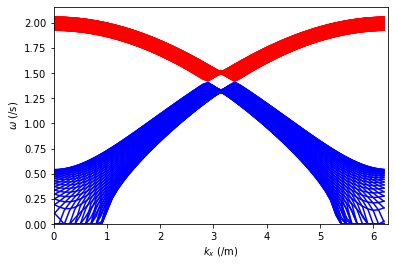

In [6]:
import numpy as np


k = 1.
m = 1.
qxs = np.arange(0, 2 * np.pi, 0.1)
qys = np.arange(0, 2 * np.pi, 0.1)
Qxs = np.exp(1.j * qxs)
Qys = np.exp(1.j * qys)

M = np.diag([m] * 2)
iM = np.linalg.inv(M)

i = np.eye(2)

evals_all = np.empty((len(qys), len(qxs), 2), dtype=np.complex128)
# evecs_all = []
for y, Qy in enumerate(Qys): 
    for x, Qx in enumerate(Qxs):
        Q1 = np.cos(np.pi / 12) * Qx - np.sin(np.pi / 12) * Qy
        Q2 = np.cos(np.pi / 12) * Qx + np.sin(np.pi / 12) * Qy
        H = np.vstack([
            np.hstack([2 * k, -k * (1 + Q2.conj())]),
            np.hstack([-k * (1 + Q1), 2 * k]),
        ])
        evals, evecs = np.linalg.eigh(iM.dot(H))
        idcs = np.argsort(evals)
        evals, evecs = evals[idcs], evecs[idcs]
        evals_all[y, x] = evals
        # evecs_all.append(evecs)


print(evals_all.shape)


import matplotlib.pyplot as plt
# fig = plt.figure()
ax = plt.axes(projection='3d')
X, Y = np.meshgrid(qxs, qys)
ax.plot_surface(X, Y, np.sqrt(evals_all[:, :, 0]).real, cmap='Blues_r') 
ax.plot_surface(X, Y, np.sqrt(evals_all[:, :, 1]).real, cmap='Reds') 

ax.set_xlabel(r"$k_x$ (/m)")
ax.set_xlim(0, np.pi * 2)
ax.set_ylabel(r"$k_y$ (/m)")
ax.set_ylim(0, np.pi * 2)
ax.set_zlabel(r"$\omega$ (/s)")
ax.set_zlim(0)
# fig.savefig("2d-dispersion.png")
plt.show()

import matplotlib.pyplot as plt
# fig = plt.figure()
data = []
for y in range(len(qys)):
    plt.plot(qxs, np.sqrt(evals_all[y, :, 0]).real, color='blue')
    plt.plot(qxs, np.sqrt(evals_all[y, :, 1]).real, color='red')
        # data.append(go.Scatter(x=qxs, y=evals_all[y, :, i].real, name=f"{qys[y],i}", line=dict(color=color)))
plt.xlabel(r"$k_x$ (/m)")
plt.xlim(0, np.pi * 2)
plt.ylabel(r"$\omega$ (/s)")
plt.ylim(0)
# fig.savefig("2d-dispersion-flat.png")
plt.show()


## 2.2 1D mechanical lattice on the non-inertial reference frame
### 2.2.1 with Coriolis force